In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import yfinance as yf

In [5]:
tickers=pd.read_html("https://topforeignstocks.com/indices/components-of-the-sp-500-index/")[0]['Ticker']
tickers


0       AAPL
1       MSFT
2       AMZN
3       NVDA
4      GOOGL
       ...  
498      FOX
499     AXON
500     AXON
501      NWS
502     DISH
Name: Ticker, Length: 503, dtype: object

In [ ]:
val = input("Enter ticker name: ")
print(val)
end_date=datetime.now()
start_date=datetime.now()-timedelta(days=15*365)
history=yf.download(val,start=start_date,end=end_date,interval='1d')
history

In [17]:

    history=history.loc[:,['Open','Close','Volume']]
    history['prev_Close']=history.loc[:,'Close'].shift(1)
    history['prev_Volume']=history.loc[:,'Volume'].shift(1)
    datetimes=history.index.values
    weekdays=[]
    for dt in datetimes:
        dt=datetime.strptime(str(dt),'%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
    history['Weekday']=weekdays
   
    history['200Mean']=history['prev_Close'].rolling(200).mean()
    history= history.replace(np.inf,np.nan).dropna()
    history

,Open,Close,Volume,prev_Close,prev_Volume,Weekday,200Mean
Date,,,,,,,
2010-02-19,13.526777,13.532533,102021876,13.594094,93382524.0,4,12.484946
2010-02-22,13.697447,13.583584,85698216,13.532533,102021876.0,0,12.502185
2010-02-23,13.588589,13.390140,114789096,13.583584,85698216.0,1,12.519618
2010-02-24,13.362863,13.300050,92970936,13.390140,114789096.0,2,12.536943
2010-02-25,13.191191,13.173924,132235632,13.300050,92970936.0,3,12.552476
...,...,...,...,...,...,...,...
2023-07-10,118.300003,116.449997,35315200,119.480003,21692600.0,0,102.204850
2023-07-11,116.290001,117.139999,23078800,116.449997,35315200.0,1,102.281400
2023-07-12,118.800003,118.930000,30404400,117.139999,23078800.0,2,102.370700


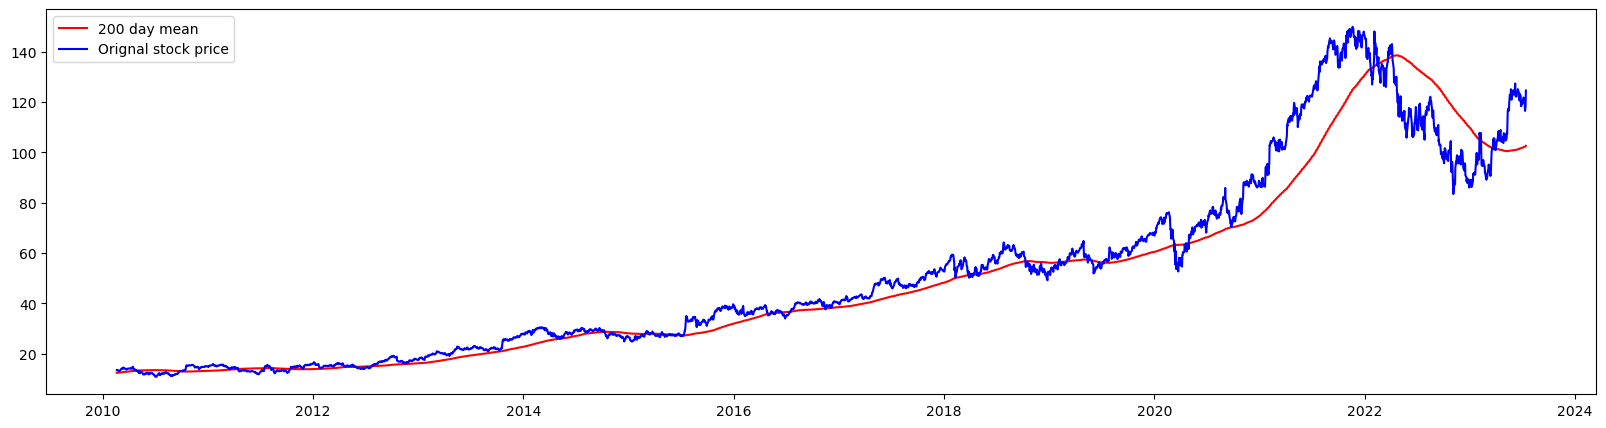

In [18]:
x=history.index.values
plt.figure(figsize=(20,5))
plt.plot(x,history['200Mean'],color='red')
plt.plot(x,history['prev_Close'],color='blue')
plt.legend(['200 day mean','Orignal stock price'])
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression

Y=history['Close']
X=history.drop(['Close','Volume'],axis=1).values
num_test=365
X_Train=X[:-1*num_test]
Y_Train=Y[:-1*num_test]
X_Test=X[-1*num_test:]
Y_Test=Y[-1*num_test:]
model=LinearRegression()
model=model.fit(X_Train,Y_Train)
preds=model.predict(X_Test)


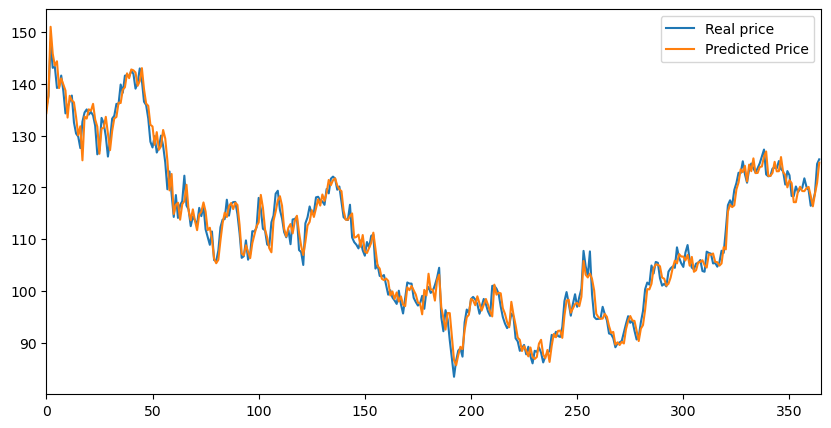

In [20]:
plt.figure(figsize=(10,5))
plt.plot((range(len(Y_Test))),Y_Test)
plt.plot((range(len(preds))),preds)
plt.xlim(0,365)
plt.legend(['Real price','Predicted Price'])
plt.show()

In [22]:
val

'GOOGL'

In [23]:
history

,Open,Close,Volume,prev_Close,prev_Volume,Weekday,200Mean
Date,,,,,,,
2010-02-19,13.526777,13.532533,102021876,13.594094,93382524.0,4,12.484946
2010-02-22,13.697447,13.583584,85698216,13.532533,102021876.0,0,12.502185
2010-02-23,13.588589,13.390140,114789096,13.583584,85698216.0,1,12.519618
2010-02-24,13.362863,13.300050,92970936,13.390140,114789096.0,2,12.536943
2010-02-25,13.191191,13.173924,132235632,13.300050,92970936.0,3,12.552476
...,...,...,...,...,...,...,...
2023-07-10,118.300003,116.449997,35315200,119.480003,21692600.0,0,102.204850
2023-07-11,116.290001,117.139999,23078800,116.449997,35315200.0,1,102.281400
2023-07-12,118.800003,118.930000,30404400,117.139999,23078800.0,2,102.370700


In [24]:
p=round(preds[-1])
print("Predicted Price for today is:",(p))

Predicted Price for today is: 125
